# C5.4 Projectile Motion
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## C5.4.1 Foundation

Projectile motion is a special case, or application, of the equations of kinematics. In this note, we will ignore friction and only consider the influence of gravitational acceleration. That is, our acceleration is (assuming a 2D vertical plane and vertical up as positive and standard metric units)

$$ \vec{a} = \begin{bmatrix} a_x  \\ a_y  \end{bmatrix} = \begin{bmatrix} 0  \\ -g  \end{bmatrix}$$

We will apply this to the equations of motion and obtain derived expressions to describe projectile motion.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## C5.4.2 Parametric Equations

Since our <b>acceleration is constant</b>, we can utilize the following equation from equations of kinematics:

$$\vec{r} = \vec{r}_0 + \vec{v}_{0}t + \frac{1}{2}\vec{a}t^2 $$

We have information about the acceleration in both x (horizontal) and y (vertical) and can divide the position vector into its components:

$$x = x_0 + v_{0x}t + \frac{1}{2}a_{x}t^2 $$

$$y = y_0 + v_{0y}t + \frac{1}{2}a_{y}t^2 $$

Acknowledging that $a_x = 0$ and $a_y = -g$, we get the <span style="color:red">parametric equations for projectile motion</span>:

<div class="alert alert-success">

$$x = x_0 + v_{0x}t \label{eq:1} \tag{1}$$

$$y = y_0 + v_{0y}t - \frac{1}{2}gt^2 \label{eq:2} \tag{2}$$
</div>

If you do not remember what parametric equations are, then this is a great time to go back and review your high school math. There is nothing like trying to visualize it, so let us implement these parametric equations into a Python script and plot it. 

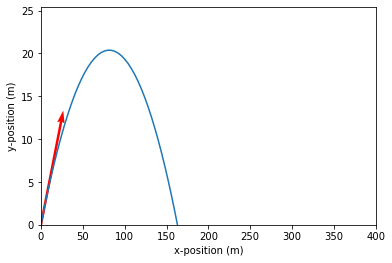

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

g = 9.81

x0 = 0
y0 = 0
v0 = [40,20]
ay = -g

t = np.arange(0,10.1,0.1)
x = x0 + v0[0]*t 
y = x0 + v0[1]*t + 0.5*ay*t**2

#scale the vector down for better display
array = np.array([[0, 0, v0[0]/1.5, v0[1]/1.5]])
X, Y, U, V = zip(*array)

plt.figure()
plt.ylabel('y-position (m)')
plt.xlabel('x-position (m)')
ax = plt.gca()
ax.plot(x,y)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy',color=['r','b'], scale=1)
ax.set_xlim([0, np.max(x)])
ax.set_ylim([0, np.max(y)+5])
plt.draw()
plt.show()                 

In the above figure, I sketched the initial velocity vector $\vec{v}_0$ as well. This velocity is referred to as the 
<span style="color:red">launch velocity</span>. The angle between the horizontal axis and the initial velocity vector is referred to as the <span style="color:red">launch angle</span> $\theta$. If we write our initial velocity components in terms of the launch speed $v_0$ and the launch angle $\theta$, we get

<div class="alert alert-success">
    
$$x = x_0 + v_{0}\cos\theta~t \label{eq:3} \tag{3}$$

$$y = y_0 + v_{0}\sin\theta~t - \frac{1}{2}gt^2 \label{eq:4} \tag{4}$$
</div>

which are often more useful than Equations (1) and (2).

We can try animate the projectile motion. This is done in the little script below. It may take a little bit of time to load.

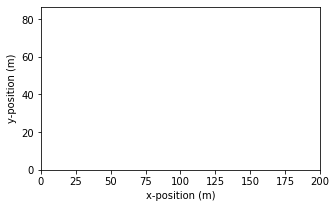

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

g = 9.81

x0 = 0
y0 = 0
v0 = [20,40]
ay = -g

t = np.arange(0,10.1,0.1)
x = x0 + v0[0]*t 
y = x0 + v0[1]*t + 0.5*ay*t**2


# initialize the plotting environment
# we are plotting from x = 0 to x = 20
# and vertical axis is twice the amplitude
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(0,np.max(x)), ylim=(0,np.max(y)+5))
plt.ylabel('y-position (m)')
plt.xlabel('x-position (m)')
parametric = ax.scatter(x0,y0)   

def animate(frame):
    x = x0 + v0[0]*frame
    y = y0 + v0[1]*frame + 0.5*ay*frame**2
    
    parametric.set_offsets(np.c_[x, y])
       
    return parametric   # return everything that must be updated

#plot 10 time snapshots separated by 500 ms
nFrames = 10
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=nFrames, interval=500)

from IPython.display import HTML
HTML(ani.to_jshtml())

We should notice that the velocity component in the x-direction does not change as there is no horizontal acceleration. The velocity component in the y-direction will decrease at first, then reverse direction, and then increase in the negative direction due to acceleration of gravity. Let us try and visualize this phenomena. This is quite a bit more complicated than the animation above.

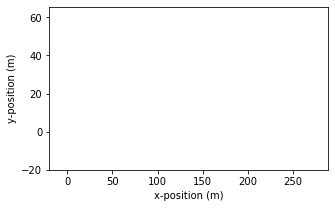

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

g = 9.81

x0 = 0
y0 = 0
v0 = 45
theta = 50
ay = -g

v0x = v0*np.cos(theta*np.pi/180)
v0y = v0*np.sin(theta*np.pi/180)

t = np.arange(0,10.1,0.1)
x = x0 + v0x*t 
y = x0 + v0y*t + 0.5*ay*t**2

array = np.array([[x[0], y[0], v0x,v0y]])
X, Y, U, V = zip(*array)

array1 = np.array([[x[0], y[0], v0x,0]])
X1, Y1, U1, V1 = zip(*array1)


array2 = np.array([[x[0], y[0], 0,v0y]])
X2, Y2, U2, V2 = zip(*array2)


# initialize the plotting environment
# we are plotting from x = 0 to x = 20
# and vertical axis is twice the amplitude
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(-20,np.max(x)), ylim=(-20,np.max(y)+5))
plt.ylabel('y-position (m)')
plt.xlabel('x-position (m)')
parametric = ax.scatter(x0,y0)  
vector = ax.quiver(X, Y, U, V, angles='xy', scale_units='xy',color=['r'], scale=1)
vector1 = ax.quiver(X1, Y1, U1, V1, angles='xy', scale_units='xy',color=['g'], scale=1)
vector2 = ax.quiver(X2, Y2, U2, V2, angles='xy', scale_units='xy',color=['b'], scale=1)

def animate(frame):
    x = x0 + v0x*frame
    y = y0 + v0y*frame + 0.5*ay*frame**2
    
    parametric.set_offsets(np.c_[x, y])
    
    vx = v0x
    vy = v0y + ay*frame
    
    global vector
    vector.remove()
    
    array = np.array([[x,y, vx,vy]])
    X, Y, U, V = zip(*array)
    vector.set_UVC(U, V)
    
    vector = ax.quiver(X, Y, U, V, angles='xy', scale_units='xy',color=['r'], scale=1)
    
    global vector1
    vector1.remove()
    
    array1 = np.array([[x,y, vx,0]])
    X1, Y1, U1, V1 = zip(*array1)
    vector1.set_UVC(U1, V1)
    
    vector1 = ax.quiver(X1, Y1, U1, V1, angles='xy', scale_units='xy',color=['g'], scale=1)
    
    global vector2
    vector2.remove()
    
    array2 = np.array([[x,y, 0,vy]])
    X2, Y2, U2, V2 = zip(*array2)
    vector2.set_UVC(U2, V2)
    
    vector2 = ax.quiver(X2, Y2, U2, V2, angles='xy', scale_units='xy',color=['b'], scale=1)
    
    return parametric, vector, vector1, vector2   # return everything that must be updated


nFrames = 10
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=nFrames, interval=500)

from IPython.display import HTML
HTML(ani.to_jshtml())

We notice that the velocity components behave as predicted! Yah for us!
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

### Application: Angry Birds
Just having too much fun!

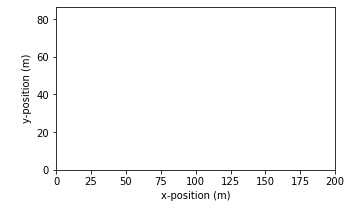

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    #ax.autoscale()
    return artists 

g = 9.81

x0 = 0
y0 = 0
v0 = [20,40]
ay = -g

t = np.arange(0,10.1,0.1)
x = x0 + v0[0]*t 
y = x0 + v0[1]*t + 0.5*ay*t**2


# initialize the plotting environment
# we are plotting from x = 0 to x = 20
# and vertical axis is twice the amplitude
image_path = 'angrybird.png'
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(0,np.max(x)), ylim=(0,np.max(y)+5))
plt.ylabel('y-position (m)')
plt.xlabel('x-position (m)')

parametric = imscatter(x0, y0, image_path, zoom=0.1, ax=ax)

def animate(frame):
    x = x0 + v0[0]*frame
    y = y0 + v0[1]*frame + 0.5*ay*frame**2
    
    global parametric
    for points in parametric:
        points.remove()
    
    parametric = imscatter(x, y, image_path, zoom=0.1, ax=ax)
    
    return parametric  # return everything that must be updated



#plot x time snapshots separated by y ms
nFrames = 10
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=nFrames, interval=500)

from IPython.display import HTML
HTML(ani.to_jshtml())

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## C5.4.3 Derived Common Projectile Parameters
For projectile motion, we are often interested in knowing parameters such as 

* maximum height (apogee)
* time to reach apogee
* how far it travels horizontally (range)
* how long it takes to land

Here, we will do a guided tour to obtain the expressions for those parameters.

<div class="alert alert-warning">
<b>Box 1: Time to Apogee</b><br>

Starting from the definition of the vertical acceleration:
    
   $$ a_y = \frac{\Delta v_y}{\Delta t}$$ 

Show that the time to reach apogee (highest point) can be written as    

$$ t = \frac{v_{0}\sin\theta}{g} $$
    
where $g$ is the magnitude of the acceleration of gravity, $v_0$ is the launch speed, $\theta$ is the launch angle, and let $t_0 = 0$ s. HINT: what is the vertical velocity at apogee? 

</div>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<div class="alert alert-warning">
<b>Box 2: Maximum Height Above Launch Point</b><br>

Starting from the vertical component of the following equation of motion:
    
   $$ y = y_0 + v_{0y}t + \frac{1}{2}a_{y}t^2$$ 

Show that the maximum height above the launch point is   

$$ h_{max} = \frac{v_{0}^2\sin^{2}\theta}{2g} $$
    
where $g$ is the magnitude of the acceleration of gravity, $v_0$ is the launch speed, $\theta$ is the launch angle, and let $t_0 = 0$ s. HINT: Use the time from previous box. 

</div>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<div class="alert alert-warning">
<b>Box 3: Maximum Horizontal Distance from Launch Point (Warning: symmetric Paths only!)</b><br>

Starting from the horizontal component of the following equation of motion (no acceleration in horizontal):
    
   $$ x = x_0 + v_{0x}t $$ 

Show that the maximum range from the launch point for a symmetric path is: <br>
    <br>

$$ R = \frac{v_{0}^2\sin(2\theta)}{g} $$
    
where $g$ is the magnitude of the acceleration of gravity, $v_0$ is the launch speed, $\theta$ is the launch angle, and let $t_0 = 0$ s. HINT: Use the time from box 1 and the trigonometric identity: $2\sin\alpha\cos\alpha = \sin(2\alpha)$.

</div>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<div class="alert alert-warning">
<b>Box 4</b><br>

A UVU rocket is launched with an N-engine. If we assume no air drag, the rocket will be on a standard projectile motion path. After the engine burns out the speed of the rocket is 140 m/s (313 mph). If the rocket is tilted 5$^\circ$ from the vertical, how high does it reach from that point? How long time does it take to cruize to apogee? When it pass through that altitude on its way down, how far is it from its upleg point?

</div>

<img src="rocket.png" width="1000">

<hr style="height:2px;border-width:0;color:gray;background-color:gray">